美国1880 ~ 2010年婴儿的名字

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_note_interactivity = "all"
%matplotlib inline


import os
import sys
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
pd.options.display.max_rows = 10

In [8]:
names1880 = pd.read_csv('E:/py_pandasDA_practice/code/datasets/babynames/yob1880.txt', names=['name', 'sex', 'births'])

In [9]:
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [10]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [12]:
years = range(1880, 2011)
pieces = []
columns =['name', 'sex', 'births']

for year in years:
    path = 'E:/py_pandasDA_practice/code/datasets/babynames/yob%d.txt' %year
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)
    
# 将所有内容粘接进一个df
names = pd.concat(pieces, ignore_index=True)

In [13]:
names1880

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [14]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


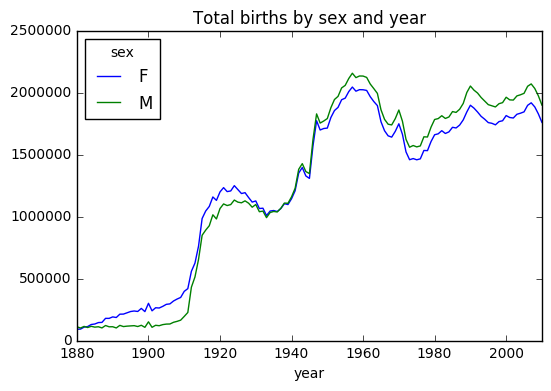

In [30]:
 # 按照性别和年份划分的出生总数
total_births.plot(title='Total births by sex and year')

In [32]:
# 插入一个prop列，给出每个婴儿名字相对于出生总数的比例。

def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
  
names = names.groupby(['year', 'sex']).apply(add_prop)

In [33]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [34]:
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, dtype: float64

In [39]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.reset_index(inplace=True, drop=True)

分析名字趋势

In [41]:
boys = top1000[top1000.sex == 'M']
grils = top1000[top1000.sex == 'F' ]

In [43]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [45]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000024781BFD518>,
      dtype=object)

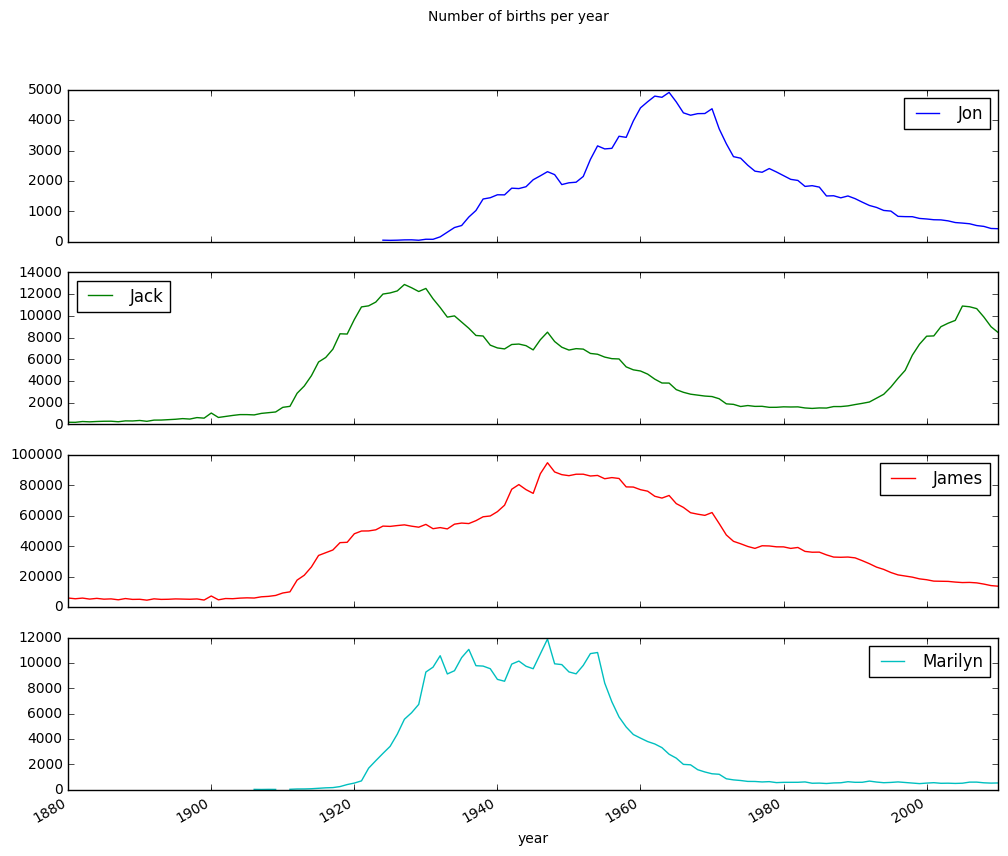

In [55]:
subset = total_births[['Jon', 'Jack', 'James', 'Marilyn']]
subset.plot(subplots=True, figsize=(12,10), grid=False,
            title='Number of births per year')

计量命名多样性的增加

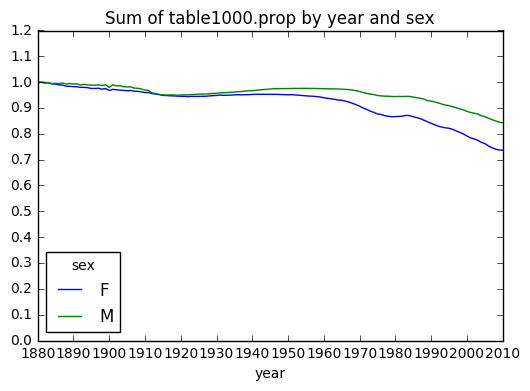

In [60]:
# 按姓名划分的Top 1k名字的出生比例

table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

#np.linspace生成等差数列

In [62]:
# 按最高到最低的受欢迎程度在出生人数最高的50%名字中排序

In [64]:
df = boys[boys.year == 2010]

In [65]:
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [66]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [68]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [69]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [71]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [73]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


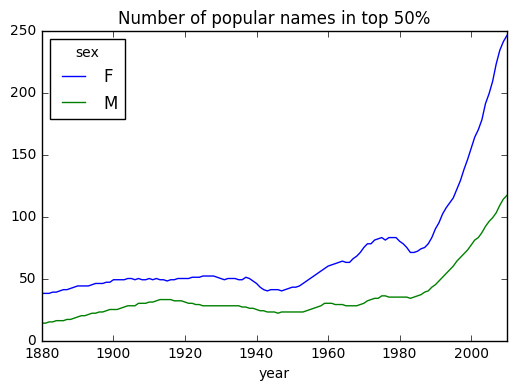

In [75]:
diversity.plot(title = "Number of popular names in top 50%")

看来女孩儿的名字比男孩子更为多样化，并且随着时间的推移它们变得越来越多。

“最后一个字母”革命

In [85]:
# 男孩名字最后一个字母的分布在过去的一百年中发生了重大变化。
# 下面按照年份、性别和最后一个字母汇总完整数据集中的所有出生情况：

# 从name列中提取最后一个字母

get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a             37825.0   38650.0   36838.0   36156.0   34654.0   32901.0   
b             48065.0   45914.0   43144.0   42600.0   42123.0   39945.0   
c             27697.0   26778.0   26078.0   26635.0   26864.0   25318.0   
d             53391.0   51754.0   50670.0   51410.0   50595.0   47910.0   
e            144769.0  142098.0  141123.0  142999.0  143698.0  140966.0   

sex                              
year             2009      2010  
last_letter                      
a             31430.0   28438.0  
b             38862.0   38859.0  
c             24048.0   23125.0  
d             46172.0   44398.0  
e            135496.0  129012.0  

[5 rows x 262 columns]

In [79]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

In [80]:
#按照出生总数对表格进行归一化处理，生成一个新表格，其中包含每个性别每个结束字母占总出生数的比例

subtable.sum()


sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [82]:
letter_prop = subtable/ subtable.sum()

In [83]:
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
...               ...       ...       ...       ...       ...       ...
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

[26 rows x 6 columns]

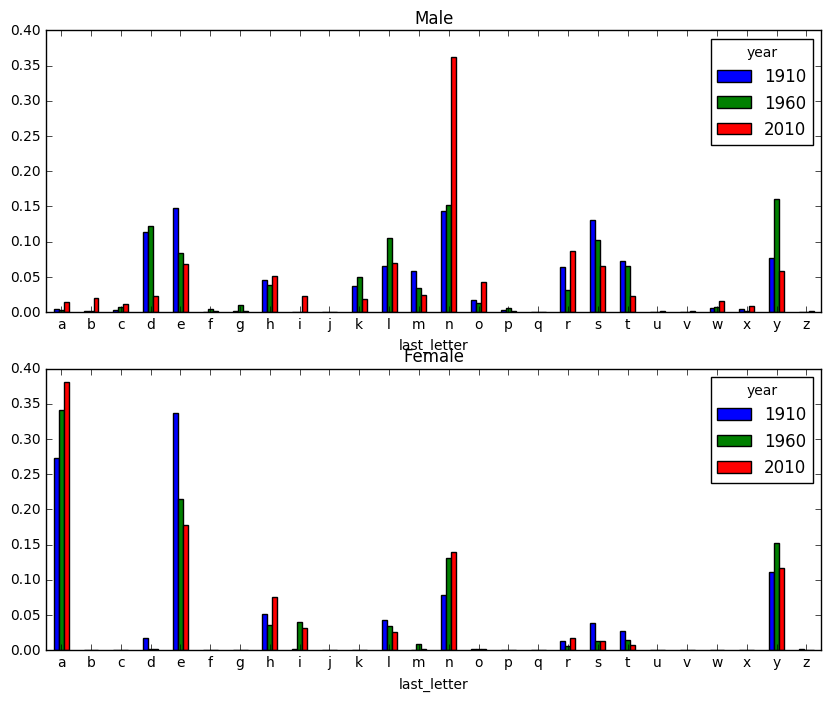

In [88]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female')

由数据可知，自20世纪60年代以来，以n为结尾的男孩子名字经历了显著地增长。

In [89]:
letter_prop = table / table.sum()

dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


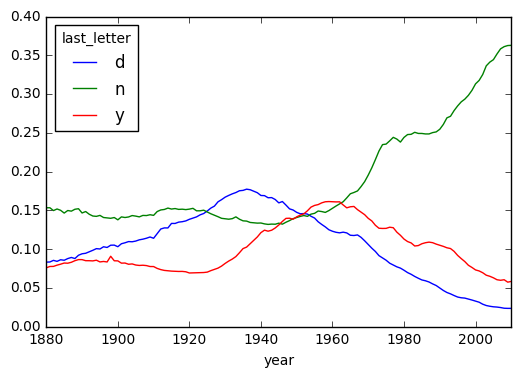

In [92]:
# 随着时间推移名字以d/n/y结尾的男孩的比例变化趋势

dny_ts.plot()

男孩名字变成女孩名字（以及反向变化）

In [94]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [97]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [98]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')

In [103]:
table = table.div(table.sum(1), axis=0).fillna(0)
table.tail()

sex,F,M
year,,
2006,1.0,0.0
2007,1.0,0.0
2008,1.0,0.0
2009,1.0,0.0
2010,1.0,0.0


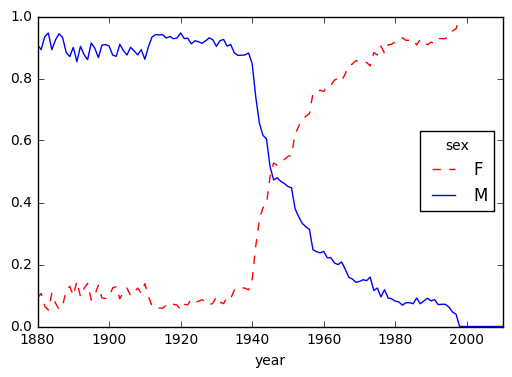

In [104]:
#随着时间推移男性/女性中Lesley样式的名字的比例

table.plot(style={'M': 'b-', 'F': 'r--'})